### Statsmodels: A Deep Dive into Statistical Modeling with Python

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


Statsmodels differs from Scikit-learn because it focuses on **inference** instead of just prediction.
It helps you understand *why* something happens not just *what* happens.


### Ordinary Least Squares (OLS) Regression

In [10]:
# Example: Predict salary using experience
df = pd.DataFrame({
    'experience': [1, 2, 3, 4, 5, 6, 7, 8],
    'salary': [30000, 35000, 40000, 45000, 50000, 55000, 60000, 90000]
})

X = sm.add_constant(df['experience'])  # add intercept
y = df['salary']

ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     34.68
Date:                Sun, 02 Nov 2025   Prob (F-statistic):            0.00106
Time:                        20:22:13   Log-Likelihood:                -81.891
No. Observations:                   8   AIC:                             167.8
Df Residuals:                       6   BIC:                             167.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.875e+04   6073.908      3.087      0.0

C:\Users\tavis\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


### Interpretation:
- The coefficient for experience shows how much salary increases per year of experience.
- A small p-value (<0.05) indicates the relationship is statistically significant.
- R² shows how much of the variation in salary is explained by experience.


### Regression Diagnostics

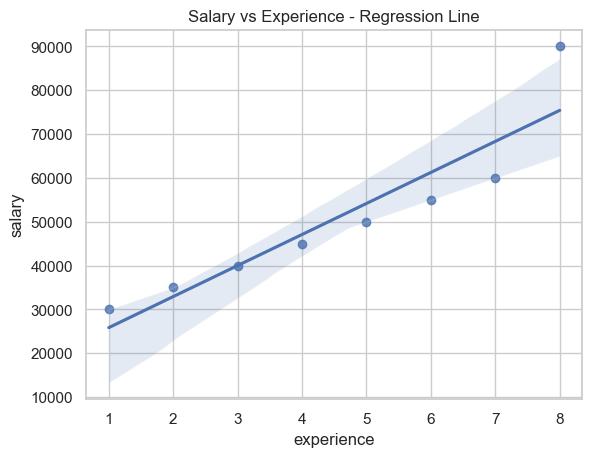

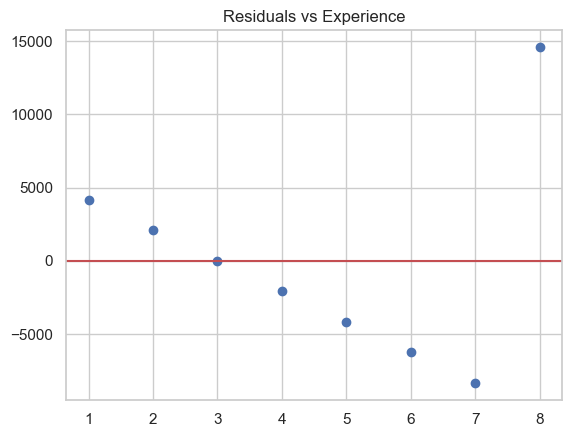

In [17]:
# Plot regression fit
sns.regplot(x='experience', y='salary', data=df)
plt.title("Salary vs Experience - Regression Line")
plt.show()

# Residual plot
plt.scatter(df['experience'], ols_model.resid)
plt.axhline(0, color='r')
plt.title("Residuals vs Experience")
plt.show()

### Logistic Regression (Binary Classification)

In [22]:
# Example: Predict if a person will buy insurance
np.random.seed(42)
df2 = pd.DataFrame({
    'age': np.random.randint(20, 60, 50),
    'income': np.random.randint(30000, 90000, 50)
})
df2['bought_insurance'] = np.where(df2['income'] > 60000, 1, 0)

X = sm.add_constant(df2[['age', 'income']])
y = df2['bought_insurance']

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       bought_insurance   No. Observations:                   50
Model:                          Logit   Df Residuals:                       47
Method:                           MLE   Df Model:                            2
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                   1.000
Time:                        20:28:59   Log-Likelihood:            -4.8902e-06
converged:                      False   LL-Null:                       -33.203
Covariance Type:            nonrobust   LLR p-value:                 3.802e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -323.0830   1.16e+04     -0.028      0.978   -2.31e+04    2.25e+04
age            0.5841     49.350      0.012      0.991     -96.14

C:\Users\tavis\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Interpretation:
- Logistic regression estimates the probability that an event occurs.
- The coefficient for income shows how income impacts purchase probability.


### ANOVA (Analysis of Variance)

In [28]:
# Example: Comparing sales performance across 3 regions
sales_data = pd.DataFrame({
    'region': ['North']*5 + ['South']*5 + ['West']*5,
    'sales': [200,220,210,190,205,150,160,155,165,158,230,240,245,235,250]
})

anova_model = smf.ols('sales ~ region', data=sales_data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
region,17102.533333,2.0,117.247715,1.331172e-08
Residual,875.200000,12.0,NaN,NaN


### Interpretation:
If the p-value < 0.05, at least one region’s mean sales differ significantly.


### Time Series Forecasting (ARIMA)

C:\Users\tavis\AppData\Local\Temp\ipykernel_32492\3417279206.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = sm.datasets.co2.load_pandas().data['co2'].resample('M').mean().fillna(method='ffill')
C:\Users\tavis\AppData\Local\Temp\ipykernel_32492\3417279206.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = sm.datasets.co2.load_pandas().data['co2'].resample('M').mean().fillna(method='ffill')


                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                  526
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -633.476
Date:                Sun, 02 Nov 2025   AIC                           1272.951
Time:                        23:45:38   BIC                           1285.742
Sample:                    03-31-1958   HQIC                          1277.960
                         - 12-31-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5666      0.051     11.098      0.000       0.467       0.667
ma.L1          0.3321      0.057      5.798      0.000       0.220       0.444
sigma2         0.6529      0.046     14.087      0.0

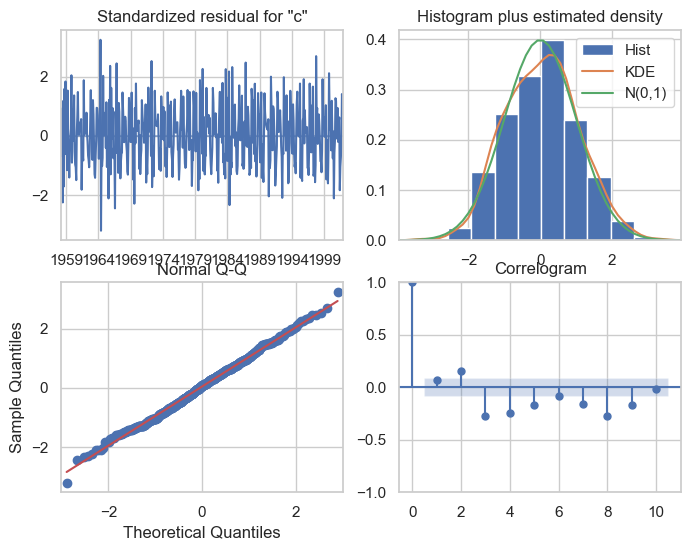

In [48]:
# Load built-in dataset
data = sm.datasets.co2.load_pandas().data['co2'].resample('M').mean().fillna(method='ffill')

# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data, order=(1, 1, 1)).fit()
print(model.summary())

# Plot forecast
model.plot_diagnostics(figsize=(8,6))
plt.show()


### Insight:
ARIMA models are used for time series forecasting by capturing trend, seasonality, and noise.


### Hypothesis Testing

In [38]:
import numpy as np
import statsmodels.api as sm

np.random.seed(42)
group1 = np.random.normal(10, 2, 30)
group2 = np.random.normal(12, 2, 30)

t_stat, p_val, df = sm.stats.ttest_ind(group1, group2)  # returns (t, p, df)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}, df: {df:.1f}")


T-statistic: -4.513, P-value: 0.0000, df: 58.0


In [40]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
print("Breusch-Pagan test:", bp_test)


Breusch-Pagan test: (4.444444444444411, 0.03501498101966317, 7.49999999999987, 0.03379778750009193)


### Interpretation:
If p < 0.05, we reject the null hypothesis — the means are statistically different.
